# Packages

In [28]:
import matplotlib.pyplot as plt
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
import numpy as np
from rpy2.robjects import r, pandas2ri

%load_ext autoreload
%autoreload 2
%load_ext rpy2.ipython


import sys
sys.path.append('/home/divar/projects/geometric-sampling')
import geometric_sampling

import geometric_sampling as gs
from geometric_sampling.search.astar import AStar
from geometric_sampling.design import Design
from geometric_sampling.criteria.var_nht import VarNHT

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [29]:
%%R
#install.packages("sampling")
library(sampling)

# Reading Data

In [30]:
# Python cell ----

import pandas as pd

# Read config file
params = pd.read_csv("config_origin.csv")

# Extract all columns as regular Python variables (from row 0)
for col in params.columns:
    globals()[col] = params.at[0, col]

# Now you have: bardia_balance_method, num_new_nodes, ... etc. as plain Python variables

In [31]:
%%R
# Read regular data (returns data.frame)

df <- read.csv("cor_zy_8.5_py_0.csv")

y   <- df$y
z   <- df$z
pik <- df$pik

# Read "extra" data (returns data.frame of one row; use as.list to extract)
extra <- read.csv("cor_zy_8.5_py_0_extra.csv")
 list2env(extra, .GlobalEnv)


<environment: R_GlobalEnv>


# Astar

5000 30 200000 0.1 0.9


Generating initial designs:   1%|▏           | 33/3000 [00:00<00:09, 324.63it/s]

Initial design 0: method = Original, efficiency z = 0.1332, y=0.5304
New best at idx=0: method = Original, efficiency z = 0.1332 and efficiency y = 0.5304
New best at idx=1: method = z, efficiency z = 0.1332 and efficiency y = 0.5304
New best at idx=2: method = z/pi, efficiency z = 0.1332 and efficiency y = 0.5304
New best at idx=3: method = swap, efficiency z = 0.1351 and efficiency y = 0.9987
New best at idx=5: method = swap, efficiency z = 0.1390 and efficiency y = 0.7321
New best at idx=6: method = swap, efficiency z = 0.1559 and efficiency y = 0.5527
New best at idx=21: method = swap, efficiency z = 0.1687 and efficiency y = 0.5413


Generating initial designs:  13%|█▍         | 381/3000 [00:01<00:07, 359.94it/s]

New best at idx=332: method = swap, efficiency z = 0.1694 and efficiency y = 0.6184
New best at idx=341: method = swap, efficiency z = 0.1721 and efficiency y = 0.6247
New best at idx=367: method = swap, efficiency z = 0.1813 and efficiency y = 0.4751


Generating initial designs:  74%|███████▎  | 2210/3000 [00:04<00:01, 494.99it/s]

New best at idx=2122: method = z_family, efficiency z = 0.2028 and efficiency y = 0.6422
New best at idx=2144: method = z_family, efficiency z = 0.2619 and efficiency y = 0.7870
New best at idx=2210: method = z_family, efficiency z = 0.5107 and efficiency y = 1.3003


Generating initial designs: 100%|██████████| 3000/3000 [00:06<00:00, 467.47it/s]



Progress: 0.0% 
=== Best Solution Updated at Iteration 0 ===
  Balancing Method:    origine
  Real and E(.) z,y:   50611.54→50611.54, 10043.62→10043.62
  Best Cost (z):       135900.027
  Best Cost (y):       18049.0732
  number of new noded: 30
  rho (z, y):          0.885
  rho (z_hat, y_hat):  0.885
  rho (p, y):          0.0
  Criteria Value:      135900.027
  Efficiency z (0→f):  0.133 → 0.511 → dsd 0.5112→ cube 2.2351
  Efficiency y (0→f):  0.53 → 1.3 → dsd 1.1738→ cube 1.4685
  Efficiency z (srs):  5.594 → 0.511 → 21.4668
  Efficiency y (srs):  2.223 → 1.3 → 4.9202
  Alpha:               0.39724616764204523
  Num changes:         1
  Design Depth:        1
  Design Size (|D|):   12
  Open set size:       114


=== Best Solution Updated at Iteration 0 ===
  Balancing Method:    origine
  Real and E(.) z,y:   50611.54→50611.54, 10043.62→10043.62
  Best Cost (z):       135837.597
  Best Cost (y):       16198.7061
  number of new noded: 30
  rho (z, y):          0.885
  rho (z_hat,

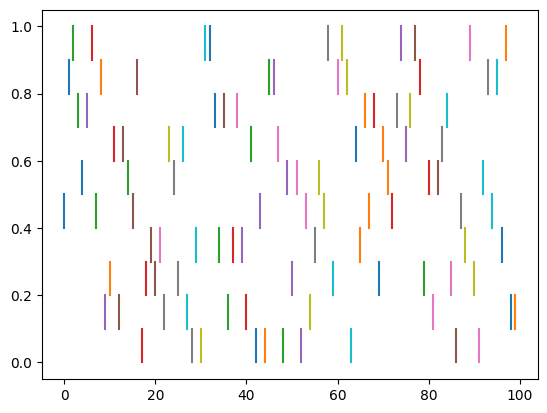

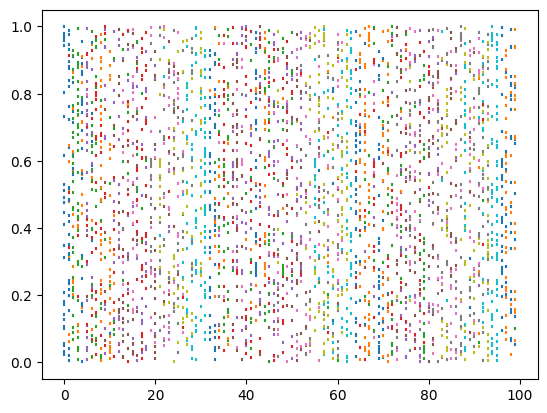

In [32]:

y = np.array(ro.r['y'])
z = np.array(ro.r['z'])
n = np.array(ro.r['n'])
N = np.array(ro.r['N'])

inclusions = np.array(ro.r['pik'])

threshold_z = float(ro.r['var_ht_z'][0])
threshold_y = float(ro.r['var_ht_y'][0])

threshold_z_cube = float(ro.r['var_cube_z'][0])
threshold_y_cube = float(ro.r['var_cube_y'][0])

inclusions = np.array(inclusions)



rng = np.random.default_rng()  # Recommended for controlled/stable random runs

print(max_iterations, num_new_nodes, max_open_set_size, switch_lower, switch_upper)

criterion = VarNHT(main_variable=y, auxiliary_variable=z, 
                   inclusion_probability=inclusions, balance_method=bardia_balance_method)

astar = AStar(
    inclusions              = inclusions,
    num_initial_nodes       = num_initial_nodes,
    initial_design_to_use   = initial_design_to_use,
    criteria                = criterion,
    z                       = z,
    y                       = y,
    threshold_z             = threshold_z,
    threshold_y             = threshold_y,
    threshold_z_cube             = threshold_z_cube,
    threshold_y_cube             = threshold_y_cube,
    switch_lower            = switch_lower,
    switch_upper            = switch_upper,
    num_changes_lower       = num_changes_lower,
    num_changes_upper       = num_changes_upper,
    show_results            = show_results,
    var_percent_exected     = var_percent_exected,
    swap_iterations         = swap_iterations,
    swap_distance           = swap_distance,
    swap_units              = swap_units,
    rng                     = rng,                         
)

result = astar.run(
    max_iterations             = max_iterations,
    num_new_nodes              = num_new_nodes,
    max_open_set_size          = max_open_set_size,
    random_restart_period      = random_restart_period,
    random_injection_count     = random_injection_count,
    prune_fraction             = prune_fraction,
    num_top_restart_nodes      = num_top_restart_nodes,
    stuck_fraction             = stuck_fraction,

)

print("Best criteria value:", astar.best_criteria_value)
print("Iterations run:", result)
print("Best criteria value:", astar.best_criteria_value)
print("Iterations run:", result)
# print(np.round(var_z_0, 1))
# print(np.round(var_y_0, 1))
astar.initial_design.show()
astar.best_design.show()

In [33]:
import pandas as pd
print("size of init design",len(list(astar.initial_design)))
print("size of best design", len(list(astar.best_design)))
#print(astar.initial_design.criteria_value())
print(astar.criteria(astar.initial_design))
print(astar.criteria(astar.best_design))
print(N)
sum_inclusion_last = 0
sum_inclusion_init = 0
for k in range(int(N)):
    size_last = 0
    prob_last = 0
    len_last = 0
    prob_last_second = 0
    prob = 0
    z_ests = []
    y_ests = []
    probs  = []
    for item in astar.best_design:
        prob += item.probability
        size_last += 1
        len_last += len(item.ids)
        probs.append(item.probability)
        ids = np.array(list(item.ids), dtype=int)
        z_ests.append(np.sum(z[ids]/inclusions[ids]))
        y_ests.append(np.sum(y[ids]/inclusions[ids]))
            
        if k in item.ids:
            
            #print(np.round(np.sum(y[ids]/inclusions[ids])), np.round(np.sum(z[ids]/inclusions[ids])))
            prob_last += item.probability
            if k+1 in item.ids:
                prob_last_second += item.probability
    sum_inclusion_last += prob_last
        #print(item)
    size_ini = 0
    prob_ini = 0
    len_ini = 0
    prob_ini_second = 0
    for item in astar.initial_design:
        len_ini += len(item.ids)
        size_ini += 1
        if k in item.ids:
            #print(item.probability)
            prob_ini += item.probability
            if k+1 in item.ids:
                prob_ini_second += item.probability
    sum_inclusion_init += prob_ini
    
        #print(item)
    #print(np.round(prob_last, 3), np.round(prob_ini, 3), np.round(inclusions[k], 3))
    if  not (len_last%n == 0 and len_ini%n == 0 and 
        np.round(prob_last, 3) == np.round(prob_ini, 3) and 
        np.round(prob_last, 3) == np.round(inclusions[k], 3)):
        print('yessssss')
print('sum of inclusions, last ini and original', sum_inclusion_last, sum_inclusion_init, sum(inclusions))
print(prob)
print('n = ', n)
#print(pd.concat([pd.Series(z_ests), pd.Series(y_ests), pd.Series(probs)], axis=1))
y_ests = np.array(y_ests)
z_ests = np.array(z_ests)
probs = np.array(probs)
print(np.sum(y), np.sum(z), np.sum(y_ests*probs), np.sum(z_ests*probs))
print(np.sum(y), np.sum(z), np.sum(y_ests*probs), np.sum(z_ests*probs))
print('var z estimates', np.round(np.sum(z_ests**2*probs)-np.sum(z_ests*probs)**2, 3))
print('var y estimates', np.round(np.sum(y_ests**2*probs)-np.sum(y_ests*probs)**2, 3))

size of init design 10
size of best design 1798
136027.84690177624
41390.32450089717
[100]


/tmp/ipykernel_281019/683604881.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  for k in range(int(N)):


sum of inclusions, last ini and original 9.999999999999982 9.99999999999998 9.99999999999998
1.0000000000000009
n =  [10]
10043.617183059716 50611.540232179024 10043.617183059718 50611.54023217902
10043.617183059716 50611.540232179024 10043.617183059718 50611.54023217902
var z estimates 41390.325
var y estimates 14074.176
